In [93]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install openpyxl

#!pip install mathjax


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy import stats

import scipy as sp

plt.rcParams['text.usetex'] = True

### 4.1

In [94]:
A1_UAMuSigmaB = np.array([[600, 12702.1, 43, 2, 188.1], [630, 10791.4, 61, 3, 219.1], [660, 8575.0, 84, 4, 93.6], [690, 6531.2, 117, 6, 65], [720, 4879.7, 159, 8, 71], [750, 3737.2, 214, 10, 69.8]])
#U A Mu Sigma B Cs-137


A1_UAMuSigmaB

array([[6.00000e+02, 1.27021e+04, 4.30000e+01, 2.00000e+00, 1.88100e+02],
       [6.30000e+02, 1.07914e+04, 6.10000e+01, 3.00000e+00, 2.19100e+02],
       [6.60000e+02, 8.57500e+03, 8.40000e+01, 4.00000e+00, 9.36000e+01],
       [6.90000e+02, 6.53120e+03, 1.17000e+02, 6.00000e+00, 6.50000e+01],
       [7.20000e+02, 4.87970e+03, 1.59000e+02, 8.00000e+00, 7.10000e+01],
       [7.50000e+02, 3.73720e+03, 2.14000e+02, 1.00000e+01, 6.98000e+01]])

### 4.2

In [95]:
A2_UAMuSigmaB = np.array([750, 3697.2, 215, 10, 57.4])
#U A Mu Sigma B Cs-137
A2_UAMuSigmaB 

array([ 750. , 3697.2,  215. ,   10. ,   57.4])

### 4.3

In [96]:
A3_ComptonkanteRückstreulinie = np.array([[481.7, 215.5] #Cs-137
, [967.7, 249.4] #Co-60
, [33.8, 24.3] #Am-241
, [33.1, 22.1] #Sr-90
, [33.4, 28]]) #Ra-226

A3_ComptonkanteRückstreulinie

array([[481.7, 215.5],
       [967.7, 249.4],
       [ 33.8,  24.3],
       [ 33.1,  22.1],
       [ 33.4,  28. ]])

### 4.4

In [97]:
A4_xNa = np.array([
  [29, 24, 19, 28, 74, 63, 55, 77, 71, 67, 65] #Abstand in mm
, [4423, 5265, 6317, 4682, 674.0, 1025, 1253, 672.0, 767.0, 877.0, 928.0]] ) # Na pro 100s

#Sortieren (nur zur übersicht)
A4_xNa[0, :] =  np.sort(A4_xNa[0, :])
A4_xNa[1, :] =  np.sort(A4_xNa[1, :])[::-1]

A4_xNa[1, :] = A4_xNa[1, :] * 0.01

A4_xNa

array([[19.  , 24.  , 28.  , 29.  , 55.  , 63.  , 65.  , 67.  , 71.  ,
        74.  , 77.  ],
       [63.17, 52.65, 46.82, 44.23, 12.53, 10.25,  9.28,  8.77,  7.67,
         6.74,  6.72]])

In [98]:
x = np.linspace(0, 95, num = 100)

In [99]:
def funcAbstand(x, A, B):
    return A/(x**2) + B

popt, pcov = optimize.curve_fit(funcAbstand, A4_xNa[0, :], A4_xNa[1, :], p0=(25000, 5))

A, B = popt

Fit = funcAbstand(x, A, B)

popt

C:\Users\schle\AppData\Local\Temp/ipykernel_12688/190317884.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return A/(x**2) + B


array([2.47496641e+04, 5.17395181e+00])

In [100]:
I0 = funcAbstand(95, A, B)
I0

7.916296858291809

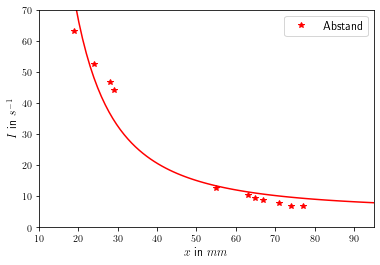

In [101]:
plt.plot(A4_xNa[0, :], A4_xNa[1, :], 'r*', label = 'Abstand')

plt.plot(x, Fit, 'r')

plt.legend(fontsize = 12)

#plt.text(10, 296, '$T_{1}(t) = 289$ $K + 38,2$ $K \cdot [1 - exp(- 0,0344$ $min^{-1} \cdot t )]$', fontsize = 12, color = 'r', rotation = 20) 

plt.xlabel('$x$ in $mm$', fontsize = 12)
plt.ylabel('$I$ in $s^{-1}$', fontsize = 12)

plt.xlim([10, 95])
plt.ylim([0, 70])

plt.savefig('AbstandCs137.png', dpi=300)

### 4.5

In [102]:
A5_DickeCs137Am241Co60Co60 = np.array([[0.46, 211, 320, 27, 26], [1, 220, 214, 26, 22], [2.045, 145, 103, 26, 13], [3.045, 135, 57, 19, 21], [4.130, 111, 42, 18, 17]])
#Dicke, Cs-137, Am241, Co-60 bei E=1170 keV, Co-60 bei 1330 keV
A5_DickeCs137Am241Co60Co60	

array([[  0.46 , 211.   , 320.   ,  27.   ,  26.   ],
       [  1.   , 220.   , 214.   ,  26.   ,  22.   ],
       [  2.045, 145.   , 103.   ,  26.   ,  13.   ],
       [  3.045, 135.   ,  57.   ,  19.   ,  21.   ],
       [  4.13 , 111.   ,  42.   ,  18.   ,  17.   ]])

In [103]:
A5_DickeCs137Am241Co60Co60[:, 1::] = A5_DickeCs137Am241Co60Co60[:, 1::] * 0.02

ln_Cs137Am241Co60Co60 =  np.log(I0 / A5_DickeCs137Am241Co60Co60[:, 1::])
ln_Cs137Am241Co60Co60

array([[0.6290884 , 0.21262554, 2.68510967, 2.72285   ],
       [0.58731899, 0.61497052, 2.72285   , 2.88990408],
       [1.00421279, 1.34621755, 2.72285   , 3.41599718],
       [1.07567176, 1.93789527, 3.03650755, 2.9364241 ],
       [1.27141633, 2.24327692, 3.09057478, 3.14773319]])

In [104]:

Massenabs_Cs137 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 0]) #Cs-137
Massenabs_Am214 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 1]) #Am214
Massenabs_Co60_1 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 2]) #Co-60
Massenabs_Co60_2 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 3]) #Co-60
#res.slope, res.intercept

In [105]:
x = np.linspace(0, 5, num = 50)

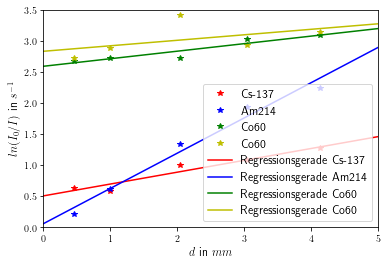

In [108]:
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 0], 'r*', label = 'Cs-137')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 1], 'b*', label = 'Am214')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 2], 'g*', label = 'Co60')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 3], 'y*', label = 'Co60')

plt.plot(x, Massenabs_Cs137.intercept + Massenabs_Cs137.slope*x, '-r', label = 'Regressionsgerade Cs-137')
plt.plot(x, Massenabs_Am214.intercept + Massenabs_Am214.slope*x, '-b', label = 'Regressionsgerade Am214')
plt.plot(x, Massenabs_Co60_1.intercept + Massenabs_Co60_1.slope*x, '-g', label = 'Regressionsgerade Co60')
plt.plot(x, Massenabs_Co60_2.intercept + Massenabs_Co60_2.slope*x, '-y', label = 'Regressionsgerade Co60')

#plt.plot(x, Fit, 'r')

plt.legend(fontsize = 12)

#plt.text(10, 296, '$T_{1}(t) = 289$ $K + 38,2$ $K \cdot [1 - exp(- 0,0344$ $min^{-1} \cdot t )]$', fontsize = 12, color = 'r', rotation = 20) 

plt.xlabel('$d$ in $mm$', fontsize = 12)
plt.ylabel('$ln(I_{0}/I)$ in $s^{-1}$', fontsize = 12)

plt.xlim([0, 5])
plt.ylim([0, 3.5])

plt.savefig('Massenabsorptionskoeffizienten.png', dpi=300)